In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [9, 6]

2022-06-18 22:42:31.287931: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-18 22:42:31.292117: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-18 22:42:31.292128: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Data Preparation

2022-06-18 22:42:33.222968: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-18 22:42:33.222999: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-18 22:42:33.223018: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (linuxxps): /proc/driver/nvidia/version does not exist
2022-06-18 22:42:33.223391: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


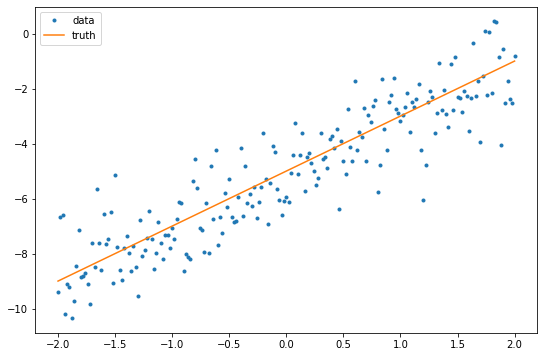

In [2]:
# create (x,y) pairs
x = tf.linspace(-2, 2, 201) # default is float64
x = tf.cast(x, tf.float32) # cast to 32
def f(x):
    y = 2*x - 5
    return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x, y, '.', label='data')
plt.plot(x, f(x), label='truth')
plt.legend()

# regression - no keras

mean squared error: 32.899506
mean squared error: 1.607994
mean squared error: 1.1179737
mean squared error: 1.1096117
mean squared error: 1.1094657
mean squared error: 1.1094632
mean squared error: 1.1094631
mean squared error: 1.1094631
mean squared error: 1.1094631
mean squared error: 1.1094631


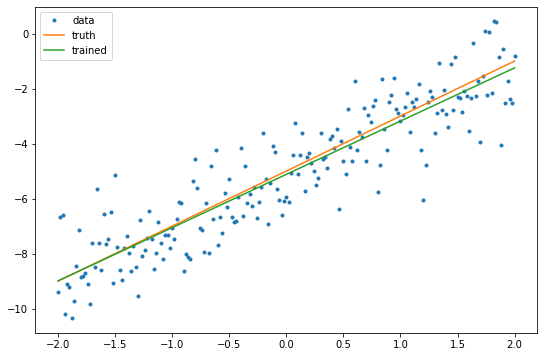

In [7]:
# y = w x + b
# variables = [w, b]
variables = [tf.Variable([[0.1]]), tf.Variable([0.1])]

learning_rate = 0.01
for step in range(1000):
    
    # define MSE
    with tf.GradientTape() as tape:
        predition = x[:, tf.newaxis] @ variables[0] + variables[1]
        predition = tf.squeeze(predition, axis=1)
        error = (y-predition)**2
        mean_error = tf.reduce_mean(error)
    
    # calculate gradient and update variables
    gradient = tape.gradient(mean_error, variables)
    variables[0].assign_add(- learning_rate*gradient[0])
    variables[1].assign_add(- learning_rate*gradient[1])
    
    if step % 100 == 0:
        print('mean squared error: ' + str(mean_error.numpy()))

# show fit
plt.figure()
plt.plot(x, y, '.', label='data')
plt.plot(x, f(x), label='truth')
plt.plot(x, predition, label='trained')
plt.legend()
plt.show()

# regression - with keras

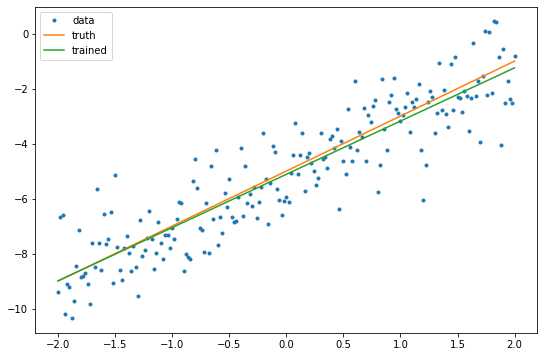

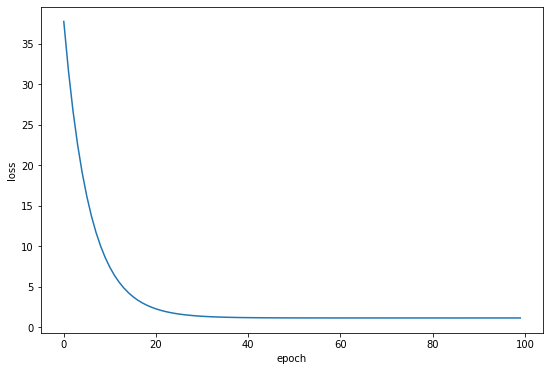

In [8]:
# define a linear model (simplest)
class LinearModel(tf.keras.Model):
    
    def __init__(self):
        super().__init__()
        # this defines wx + b
        self.dense = tf.keras.layers.Dense(units=1)
    
    def call(self, x, training=True):
        x = x[:, tf.newaxis] # x is expected to be a 1D array
        x = self.dense(x)
        return tf.squeeze(x, axis=1)

# initialise model and run Keras methods
model = LinearModel()
model.compile(loss=tf.keras.losses.MSE,
                 optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))
history = model.fit(x, y, epochs=100, batch_size=51, verbose=0)

# plot
plt.figure()
plt.plot(x, y, '.', label='data')
plt.plot(x, f(x), label='truth')
plt.plot(x, model(x), label='trained')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('epoch'), plt.ylabel('loss')
plt.show()